<a href="https://colab.research.google.com/github/lathamithu/Techvolt-Intern/blob/master/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load the required libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [ ]:
# Loading train and test data

df = pd.read_csv("Train.csv")
test = pd.read_csv('Test.csv')

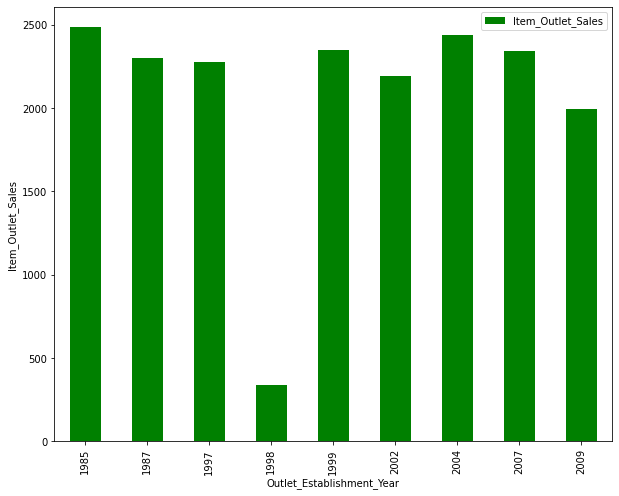

In [ ]:
# Checking out the impact of Outlet_Establishment_Year over Item_Outlet_Sales

df.pivot_table(index='Outlet_Establishment_Year', values="Item_Outlet_Sales").plot(kind='bar', color='g',figsize=(10,8))
plt.xlabel("Outlet_Establishment_Year")
plt.ylabel("Item_Outlet_Sales")
plt.show()

The Outlet_Establishment_Year attribute seems to show no contribution in the prediction of Item_Outlet_Sales. So let's drop the column.

In [ ]:
#Setting the Item_Identifier as the index of the Dataframe

df=df.set_index('Item_Identifier')

#Dropping Outlet_Establishment_Year since it has less impact over the target variable

df = df.drop(["Outlet_Establishment_Year"],axis=1)
df.head(10)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,
FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700
FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,NaN,Tier 3,Grocery Store,732.3800
NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052
FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,Medium,Tier 3,Supermarket Type2,556.6088
FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,High,Tier 3,Supermarket Type1,343.5528
FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,Medium,Tier 3,Supermarket Type3,4022.7636
FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,NaN,Tier 2,Supermarket Type1,1076.5986


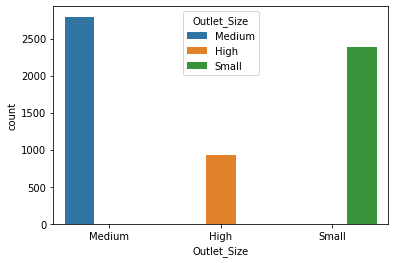

In [ ]:
# Plot of Outlet_Size

sns.countplot(x="Outlet_Size", hue="Outlet_Size", data = df)

Medium sized outlet has the highest count from the graph

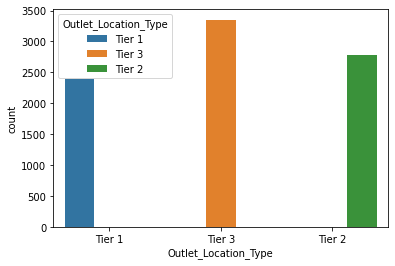

In [ ]:
# Plot of Outlet_Location_Type

sns.countplot(x="Outlet_Location_Type", hue="Outlet_Location_Type", data = df)

Tier 3 has higher count than Tier 1 and 2

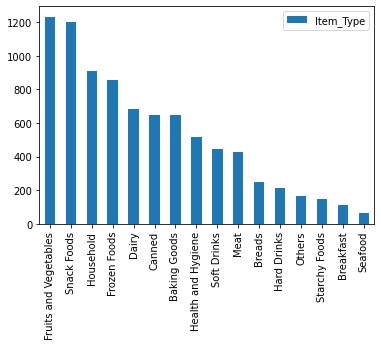

In [ ]:
# Plot of Item_Type

df.Item_Type.value_counts().plot(kind='bar')
plt.legend()


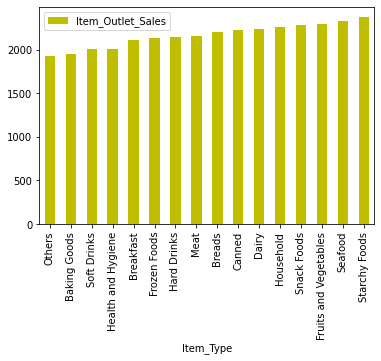

In [ ]:
# Impact of Item_Type over Item_Outlet_Sales

df.groupby('Item_Type')[['Item_Type','Item_Outlet_Sales']].mean().sort_values(by='Item_Outlet_Sales').plot(kind='bar',color='y')

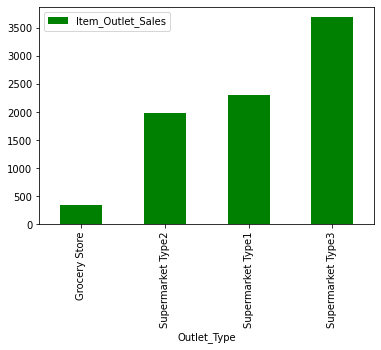

In [ ]:
# Impact of Outlet_Type over Item_Outlet_Sales

df.groupby('Outlet_Type')[['Outlet_Type','Item_Outlet_Sales']].mean().sort_values(by='Item_Outlet_Sales').plot(kind='bar',color='g')

Type 3 Supermarket is being preferred more than the other outlet types

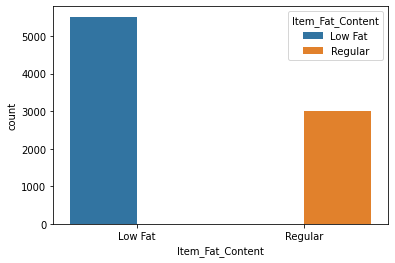

In [ ]:
# Plot of Item_Fat_Content

df['Item_Fat_Content']=df['Item_Fat_Content'].map({'Regular':'Regular','reg':'Regular','Low Fat':'Low Fat','low fat':'Low Fat','LF':'Low Fat'})
sns.countplot(x="Item_Fat_Content", hue="Item_Fat_Content", data = df)

Items with low fat content tops the list

In [ ]:
#Converting the categorical data into numerical data appropriately

df['Item_Fat_Content']=df['Item_Fat_Content'].map({'Regular':0,'Low Fat':1})
df['Outlet_Size']=df['Outlet_Size'].map({'Small':0,'Medium':1,'High':2})
df['Outlet_Location_Type']=df['Outlet_Location_Type'].map({'Tier 1':1,'Tier 2':2,'Tier 3':3})
df.head(10)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,
FDA15,9.300,1,0.016047,Dairy,249.8092,OUT049,1.0,1,Supermarket Type1,3735.1380
DRC01,5.920,0,0.019278,Soft Drinks,48.2692,OUT018,1.0,3,Supermarket Type2,443.4228
FDN15,17.500,1,0.016760,Meat,141.6180,OUT049,1.0,1,Supermarket Type1,2097.2700
FDX07,19.200,0,0.000000,Fruits and Vegetables,182.0950,OUT010,NaN,3,Grocery Store,732.3800
NCD19,8.930,1,0.000000,Household,53.8614,OUT013,2.0,3,Supermarket Type1,994.7052
FDP36,10.395,0,0.000000,Baking Goods,51.4008,OUT018,1.0,3,Supermarket Type2,556.6088
FDO10,13.650,0,0.012741,Snack Foods,57.6588,OUT013,2.0,3,Supermarket Type1,343.5528
FDP10,NaN,1,0.127470,Snack Foods,107.7622,OUT027,1.0,3,Supermarket Type3,4022.7636
FDH17,16.200,0,0.016687,Frozen Foods,96.9726,OUT045,NaN,2,Supermarket Type1,1076.5986


In [ ]:
# Treating the missing values 

df['Item_Weight'] = df['Item_Weight'].replace(0, np.NaN)
df.fillna(df.mean(),inplace=True)

df['Outlet_Size'] = df['Outlet_Size'].replace(0, np.NaN)
df.fillna(df.median(),inplace=True)

df['Item_Outlet_Sales']=df['Item_Outlet_Sales'].replace(0, np.NaN)
df.fillna(df.mean(),inplace=True)

In [ ]:
# Normalization of the data

df=pd.get_dummies(df,columns=['Item_Type','Outlet_Identifier','Outlet_Type'])
df.head(10)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
Item_Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
FDA15,9.300000,1,0.016047,249.8092,1.000000,1,3735.1380,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
DRC01,5.920000,0,0.019278,48.2692,1.000000,3,443.4228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
FDN15,17.500000,1,0.016760,141.6180,1.000000,1,2097.2700,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
FDX07,19.200000,0,0.000000,182.0950,0.761819,3,732.3800,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
NCD19,8.930000,1,0.000000,53.8614,2.000000,3,994.7052,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
FDP36,10.395000,0,0.000000,51.4008,1.000000,3,556.6088,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
FDO10,13.650000,0,0.012741,57.6588,2.000000,3,343.5528,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
FDP10,12.857645,1,0.127470,107.7622,1.000000,3,4022.7636,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
FDH17,16.200000,0,0.016687,96.9726,0.761819,2,1076.5986,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [ ]:
x = df.drop(["Item_Outlet_Sales"],axis=1)           #independent variable
y = df.Item_Outlet_Sales                            #dependent variable

In [ ]:
# Splitting into train and test data

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)
print(len(x_train),len(x_test))

5966 2557


In [ ]:
# Fitting the linear regression model

reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
reg.coef_

array([-1.68607223e+00, -3.14855799e+01, -3.30412640e+02,  1.53630035e+01,
        8.53466282e+00,  1.19467426e+02,  1.25792828e+01, -8.34418793e+01,
       -6.55090852e+00,  4.31861380e+01, -8.69813301e+01, -3.22527772e+01,
       -1.10709353e+00, -1.50506220e-01, -4.00629853e+01, -4.05834726e+01,
       -8.25764102e-02, -7.05871442e+00,  2.06831756e+02,  2.25602750e+01,
       -4.34155798e+01,  5.65303717e+01, -6.22245920e+02, -1.31864305e+02,
        9.28472362e+01, -5.08223341e+01, -4.29711146e+02,  7.91807229e+02,
        1.12935690e+02, -6.00648390e+01,  9.46078549e+01,  2.02510535e+02,
       -1.05195707e+03,  3.10972172e+02, -5.08223341e+01,  7.91807229e+02])

In [ ]:
reg.intercept_

-371.16655789081733

In [ ]:
# Predicting the x_train values
pred_train_lr= reg.predict(x_train)
pred_train_lr

array([1603.03910878, 2476.87014662, 3931.99041327, ..., 1504.40714463,
       1860.43170925, 3055.13434254])

In [ ]:
# Predicting the x_test values
pred_test_lr= reg.predict(x_test)
pred_test_lr

array([2450.78386778, 2537.32745437, 2173.29597152, ..., 1722.81005163,
       2642.45984203, 2812.48474318])

In [ ]:
# RMSE value
print(np.sqrt(mean_squared_error(y_train,pred_train_lr)))

# R-squared value
print(r2_score(y_train, pred_train_lr))

1116.279822028104
0.5633974724933988


In [ ]:
# Checking the train and test score of linear regression

train_score=reg.score(x_train, y_train)
test_score=reg.score(x_test, y_test)

In [ ]:
# Finding the number of features used for fitting

coeff_used = np.sum(reg.coef_!=0)
print("Number of features used: ", coeff_used)

Number of features used:  36


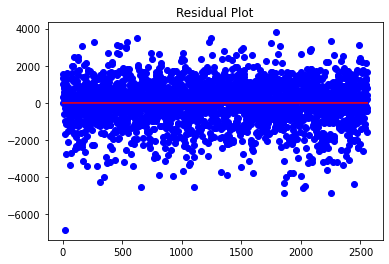

In [ ]:
# Residual plot

x = [i for i in range(1,len(pred_test_lr)+1)]

x_plot = plt.scatter(x,(pred_test_lr-y_test),c = 'b')
plt.plot(x,[0]*len(pred_test_lr),c = 'r')

plt.title("Residual Plot")
plt.show()

REGULARZATION

In [ ]:
predictors = x_train.columns
predictors

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Size', 'Outlet_Location_Type', 'Item_Type_Baking Goods',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049',
       'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3

In [ ]:
coef = pd.Series(reg.coef_,predictors).sort_values()
coef

Outlet_Type_Grocery Store         -1051.957066
Outlet_Identifier_OUT010           -622.245920
Outlet_Identifier_OUT019           -429.711146
Item_Visibility                    -330.412640
Outlet_Identifier_OUT013           -131.864305
Item_Type_Dairy                     -86.981330
Item_Type_Breads                    -83.441879
Outlet_Identifier_OUT045            -60.064839
Outlet_Type_Supermarket Type2       -50.822334
Outlet_Identifier_OUT018            -50.822334
Item_Type_Soft Drinks               -43.415580
Item_Type_Household                 -40.583473
Item_Type_Health and Hygiene        -40.062985
Item_Type_Frozen Foods              -32.252777
Item_Fat_Content                    -31.485580
Item_Type_Others                     -7.058714
Item_Type_Breakfast                  -6.550909
Item_Weight                          -1.686072
Item_Type_Fruits and Vegetables      -1.107094
Item_Type_Hard Drinks                -0.150506
Item_Type_Meat                       -0.082576
Outlet_Size  

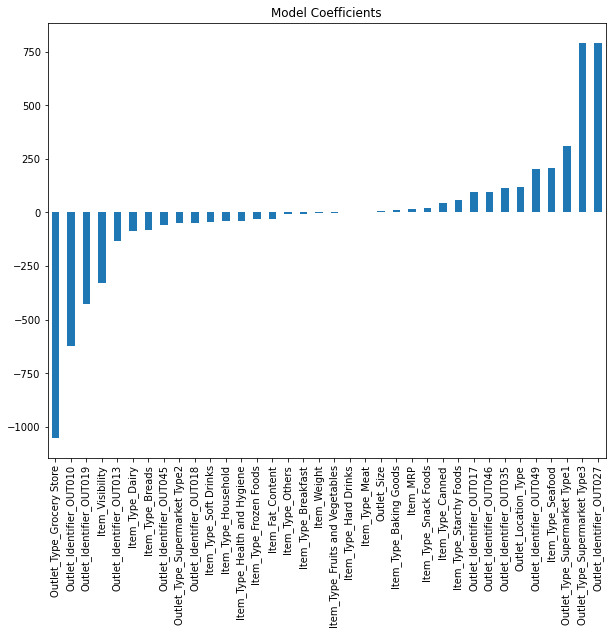

In [ ]:
coef.plot(kind = 'bar',title = 'Model Coefficients',figsize=(10,8))

RIDGE REGRESSION

In [ ]:
# Fitting the ridge regression model

from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha=0.001,normalize=True) #  comparison with alpha value
ridgeReg.fit(x_train, y_train)
pred1 = ridgeReg.predict(x_test)

In [ ]:
ridgeReg.coef_ 

array([  -1.68107193,  -31.4965484 , -331.87524536,   15.34750874,
         32.3691086 ,   50.84376011,   24.62936508,  -71.00718409,
          5.74126707,   55.43989967,  -74.50845205,  -19.93131255,
         11.21739614,   12.14619434,  -27.86767983,  -28.1362451 ,
         12.18741037,    4.97552309,  218.9281374 ,   34.8963577 ,
        -31.21221158,   68.87694163, -851.85607875,  -67.13170515,
        118.26718784,  -86.77052575, -802.21480471,  755.48636111,
        132.71819005,  -34.45447521,   45.83997435,  153.61621558,
       -887.83972965,  150.50168558,  -86.77052575,  755.48636111])

In [ ]:
ridgeReg.intercept_ 

-127.2582318602058

In [ ]:
ridge_rmse = np.sqrt(mean_squared_error(y_test,pred1))
ridge_r2 = r2_score(y_test,pred1)
coeff_used = np.sum(ridgeReg.coef_!=0)
print("RMSE = ",ridge_rmse,"R2 = ",ridge_r2)
print("Number of features used: ", coeff_used)

RMSE =  1153.993169228925 R2 =  0.5626718351671283
Number of features used:  36


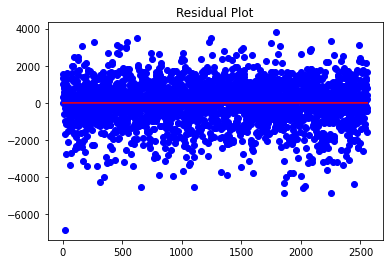

In [ ]:
# Residual plot

x = [i for i in range(1,len(pred1)+1)]

x_plot = plt.scatter(x,(pred1-y_test),c = 'b')
plt.plot(x,[0]*len(pred1),c = 'r')
plt.title("Residual Plot")
plt.show()

In [ ]:
df = pd.DataFrame(columns = ['Linear Reg','Ridge Reg'])
for i in range(len(ridgeReg.coef_)):
  df = df.append({'Linear Reg' :reg.coef_[i], 'Ridge Reg' : ridgeReg.coef_[i]}, ignore_index = True)
df.head(10)

,Linear Reg,Ridge Reg
0,-1.686072,-1.681072
1,-31.485580,-31.496548
2,-330.412640,-331.875245
3,15.363004,15.347509
4,8.534663,32.369109
5,119.467426,50.843760
6,12.579283,24.629365
7,-83.441879,-71.007184
8,-6.550909,5.741267
9,43.186138,55.439900


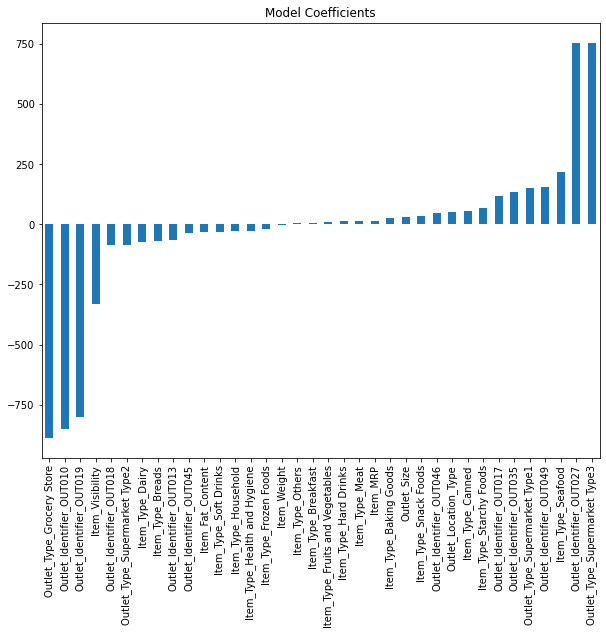

In [ ]:
predictors = x_train.columns
coef = pd.Series(ridgeReg.coef_,predictors).sort_values()
coef.plot(kind = 'bar', title = 'Model Coefficients',figsize=(10,8))

In [ ]:
# Checking the train and test score of ridge regression

Ridge_train_score = ridgeReg.score(x_train,y_train)
Ridge_test_score = ridgeReg.score(x_test, y_test)

In [ ]:
print("Linear regression train score:", train_score)
print('\n')
print("Ridge regression train score:", Ridge_train_score)
print('\n')
print("Linear regression test score:", test_score)
print('\n')
print("Ridge regression test score:", Ridge_test_score)

Linear regression train score: 0.5633974724933988


Ridge regression train score: 0.5633971001611531


Linear regression test score: 0.5627080481600449


Ridge regression test score: 0.5626718351671283


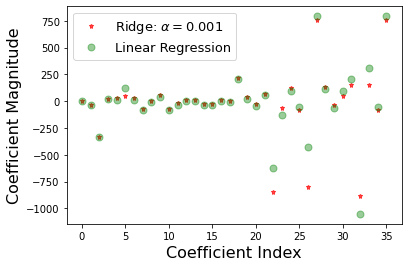

In [ ]:
plt.plot(ridgeReg.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge: $\alpha = 0.001$')
plt.plot(reg.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13)
plt.show()

LASSO REGRESSION

In [ ]:
# Fitting the lasso regression model

from sklearn.linear_model import Lasso
lassoReg = Lasso(alpha=0.01, max_iter=10e5, normalize = True)
lassoReg.fit(x_train,y_train)
pred2 = lassoReg.predict(x_test)


In [ ]:
lassoReg.coef_

array([-1.50828523e+00, -3.10564069e+01, -3.17793983e+02,  1.53502713e+01,
        0.00000000e+00,  0.00000000e+00,  1.24814997e+01, -7.57490419e+01,
       -0.00000000e+00,  4.34570595e+01, -8.15883709e+01, -2.69918147e+01,
        0.00000000e+00,  0.00000000e+00, -3.44017289e+01, -3.55467366e+01,
        0.00000000e+00, -0.00000000e+00,  2.00240216e+02,  2.36486260e+01,
       -3.71173051e+01,  5.36135470e+01, -0.00000000e+00,  0.00000000e+00,
        9.30300486e+01, -1.47084662e+02, -4.23919100e+01,  1.39435571e+03,
        1.15355472e+02, -5.52310771e+01, -1.84193484e+01,  8.52542520e+01,
       -1.86283600e+03,  0.00000000e+00, -1.39313951e+02,  0.00000000e+00])

In [ ]:
lassoReg.intercept_

178.43130356057918

In [ ]:
lasso_rmse = np.sqrt(mean_squared_error(y_test,pred2))
lasso_r2 = r2_score(y_test,pred2)
coeff_used = np.sum(lassoReg.coef_!=0)
print("RMSE = ",lasso_rmse)
print("R2 = ",lasso_r2)
print("Number of features used: ", coeff_used)

RMSE =  1153.9088114874003
R2 =  0.5627357708451852
Number of features used:  25


In [ ]:
# Checking the train and test score of lasso regression

train_score_lasso=lassoReg.score(x_train,y_train)
test_score_lasso=lassoReg.score(x_test,y_test)

In [ ]:
df1 = pd.DataFrame(columns = ['Linear Reg','Ridge Reg','Lasso Reg'])

for i in range(len(ridgeReg.coef_)):
  df1 = df1.append({'Linear Reg' :reg.coef_[i], 'Ridge Reg' :ridgeReg.coef_[i], 'Lasso Reg': lassoReg.coef_[i]},
                 ignore_index = True)
df1.head()

,Linear Reg,Ridge Reg,Lasso Reg
0,-1.686072,-1.681072,-1.508285
1,-31.485580,-31.496548,-31.056407
2,-330.412640,-331.875245,-317.793983
3,15.363004,15.347509,15.350271
4,8.534663,32.369109,0.000000


In [ ]:
print("Linear regression train score:", train_score)
print('\n')
print("Lasso regression train score:", train_score_lasso)
print('\n')
print("Linear regression test score:", test_score)
print('\n')
print("Lasso regression test score:", test_score_lasso)

Linear regression train score: 0.5633974724933988


Lasso regression train score: 0.5633926253185761


Linear regression test score: 0.5627080481600449


Lasso regression test score: 0.5627357708451852


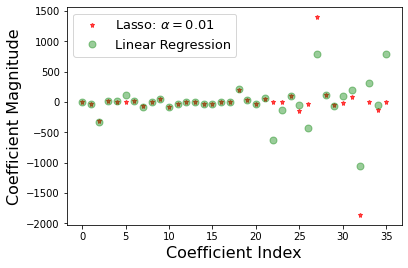

In [ ]:
plt.plot(lassoReg.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso: $\alpha = 0.01$')
plt.plot(reg.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13)
plt.show()

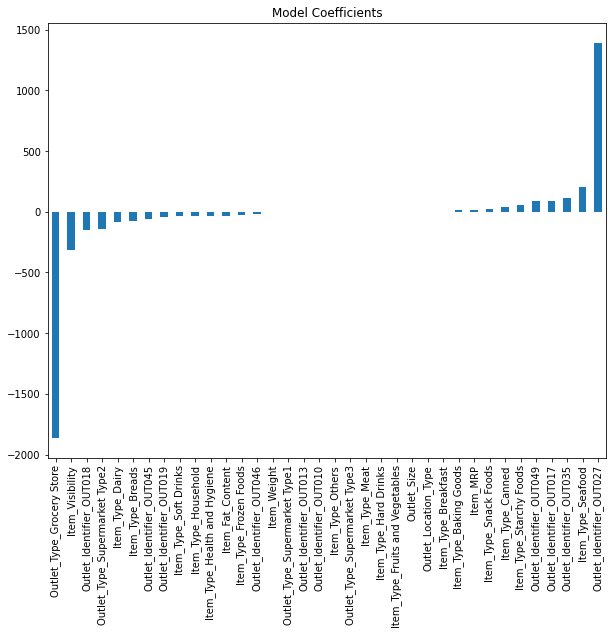

In [ ]:
coef = pd.Series(lassoReg.coef_,predictors).sort_values()
coef.plot(kind = 'bar', title = 'Model Coefficients',figsize=(10,8))

PREDICTING TEST.CSV 

In [ ]:
test = test.set_index('Item_Identifier')
test = test.drop(["Outlet_Establishment_Year"],axis=1)


In [ ]:
test['Item_Fat_Content'] = test['Item_Fat_Content'].map({'Regular':0,'reg':0,'Low Fat':1,'low fat':1,'LF':1})
test['Outlet_Size'] = test['Outlet_Size'].map({'Small':0,'Medium':1,'High':2})
test['Outlet_Location_Type'] = test['Outlet_Location_Type'].map({'Tier 1':1,'Tier 2':2,'Tier 3':3})

In [ ]:
test['Item_Weight'] = test['Item_Weight'].replace(0, np.NaN)
test.fillna(test.mean(),inplace=True)

test['Outlet_Size'] = test['Outlet_Size'].replace(0, np.NaN)
test.fillna(test.median(),inplace=True)


In [ ]:
test = pd.get_dummies(test, columns=['Item_Type','Outlet_Identifier','Outlet_Type'])

In [ ]:
test.head(10)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
Item_Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
FDW58,20.750000,1,0.007565,107.8622,1.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
FDW14,8.300000,0,0.038428,87.3198,0.761718,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
NCN55,14.600000,1,0.099575,241.7538,0.761718,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
FDQ58,7.315000,1,0.015388,155.0340,0.761718,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
FDY38,12.695633,0,0.118599,234.2300,1.000000,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
FDH56,9.800000,0,0.063817,117.1492,1.000000,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
FDL48,19.350000,0,0.082602,50.1034,1.000000,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
FDC48,12.695633,1,0.015782,81.0592,1.000000,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
FDN33,6.305000,0,0.123365,95.7436,0.761718,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [ ]:
pred_test= reg.predict(test)
pred_test

array([1880.99477758, 1505.91038409, 1937.53646906, ..., 1836.7370714 ,
       3592.71341465, 1343.65045291])

In [ ]:
reg.score(test, pred_test)

1.0

In [ ]:
pred_test_r= ridgeReg.predict(test)
pred_test_r

array([1881.4955805 , 1506.78113788, 1936.44080276, ..., 1836.97994614,
       3591.48373888, 1344.51812286])

In [ ]:
ridgeReg.score(test, pred_test_r)

1.0

In [ ]:
pred_test_l= lassoReg.predict(test)
pred_test_l

array([1878.29082948, 1505.52474899, 1941.86003957, ..., 1842.0449191 ,
       3586.34450403, 1343.93939093])

In [ ]:
lassoReg.score(test, pred_test_l)

1.0

In [ ]:
# Appending the predicted values to the test dataframe

test['Item_Outlet_Sales'] = pred_test.tolist()
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
FDW58,20.750000,1,0.007565,107.8622,1.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1880.994778
FDW14,8.300000,0,0.038428,87.3198,0.761718,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1505.910384
NCN55,14.600000,1,0.099575,241.7538,0.761718,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1937.536469
FDQ58,7.315000,1,0.015388,155.0340,0.761718,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,2633.533156
FDY38,12.695633,0,0.118599,234.2300,1.000000,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,5030.287364


From the above analysis,  
*   there seems to be no significance between the Outlet_Establishment_Year and Item_Outlet_Sales as the variables are independent of each other. 
*   Hence we drop the Outlet_Establishment_Year column. 
*   Item_Weight and Outlet_Size have missing values or Null in Data Analysis and so we have imputed the missing values using mean and median respectively.
*   Item_Visibility vs Item_Outlet_Sales indicates that the more visible a product is the less higher its sales will be.
*   Item_Weight, Item_Visibility and Item_MRP have the highest impact on the target variable Item_Outlet_Sales.
*   For the conversion of categorical data into numerical data, we make use of dummy variables.
*   And then our model is ready to be trained.
*   We fit them with the algorithm and make necessary regularizations.
*   RMSE and R-squared values are computed.
*   Residual plots are made.